In [1]:
#coding:utf-8 
import json
import datetime

import pandas as pd
from numpy import array
import numpy as np

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.figure as fig
   
from pyspark.sql import *
# import pyspark.sql.functions as fs
# from pyspark.sql import SparkSession
# from pyspark.sql import Row
# from pyspark.sql.types import *

data=spark.read.parquet("file:///Users/ppx/Desktop/2018-05-25")
data.first()
type(data)

Row(obd_time='2018-05-16 18:26:38', charge_status='\\xE6\\x9C\\xAA\\xE5\\x85\\x85\\xE7\\x94\\xB5', voltage='592.9', current='5.8', battery_cell_voltage_highest_value='4.16', battery_cell_voltage_lowest_value='3.99', maximum_temperature_value='38', minimum_temperature_value='-40', highest_alert_level='\\xE6\\x97\\xA0\\xE6\\x95\\x85\\xE9\\x9A\\x9C', temperature_difference_alert='False', battery_high_temperature_alert='False', energy_storage_device_high_voltage_alert='False', energy_storage_device_low_voltage_alert='False', soc_low_alert='False', single_battery_high_voltage_alert='False', single_battery_low_voltage_alert='False', soc_too_high_alert='False', soc_jumping_alert='False', rechargeable_energy_storage_system_mismatch_alert='False', battery_cell_consistency_low_alert='False', insulation_alert='False', dc_dc_temperature_alert='False', braking_system_alert='False', dc_dc_status_alert='False', motor_controller_temperature_alert='False', hvil_alert='False', motor_temperature_alert='F

pyspark.sql.dataframe.DataFrame

In [8]:
# 电池电压列表
import pandas
data1=data.select('vin','obd_time','battery_cell_voltage_list').toPandas()
# data1
type(data1)

list1=[]
for n in data1['battery_cell_voltage_list']:
    list1.append(np.var(json.loads(n)).round(4))
    
data1['battery_cell_voltage_list']=list1
data1
# data1.to_csv('/Users/ppx/Desktop/var.txt', sep='\t', index=False)


pandas.core.frame.DataFrame

,vin,obd_time,battery_cell_voltage_list
0,LEWTEB140JN100214,2018-05-16 18:26:38,0.0004
1,LEWTEB140JN100214,2018-05-16 18:26:39,0.0004
2,LEWTEB140JN100214,2018-05-16 18:26:40,0.0004
3,LEWTEB140JN100214,2018-05-16 18:26:41,0.0004
4,LEWTEB140JN100214,2018-05-16 18:26:42,0.0004
...,...,...,...
4680,VINH170209S170307,2018-05-25 17:10:15,0.0063
4681,VINH170209S170307,2018-05-25 17:10:45,0.0063
4682,VINH170209S170307,2018-05-25 17:11:15,0.0063
4683,VINH170209S170307,2018-05-25 17:11:45,0.0063


<Figure size 1600x640 with 0 Axes>

([<matplotlib.axis.XTick at 0x1219e15f8>,
  ...],
 <a list of 2579 Text xticklabel objects>)

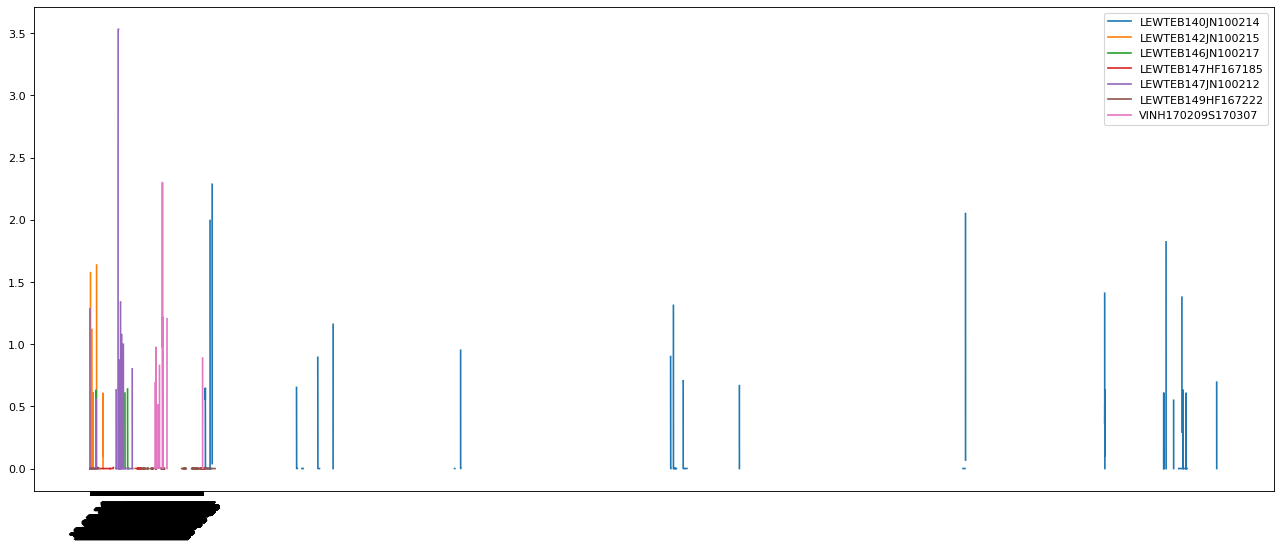

In [84]:
# 根据车辆vin分组绘制时间序列图
data1['battery_cell_voltage_list']=data1['battery_cell_voltage_list'].astype('double')

data1['obd_time'] = pd.to_datetime(data1['obd_time'])
data1.set_index('obd_time',inplace=True)



plt.figure(figsize=(20,8),dpi=80) 

for group_name,group_data in data1.groupby('vin'):
   
    data12=group_data.resample('30S').mean()['battery_cell_voltage_list']
#     data12.dropna()
    
    _x = data12.index
    _y = data12.values
    
    _x=[i.strftime("%y-%m-%d") for i in _x]
    
    plt.plot(range(len(_x)),_y,label=group_name)
    
plt.xticks(range(len(_x)),_x,rotation=45)
plt.legend(loc="best")    
plt.show()

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

([<matplotlib.axis.XTick at 0x113900f98>,
  ...],
 <a list of 2579 Text xticklabel objects>)

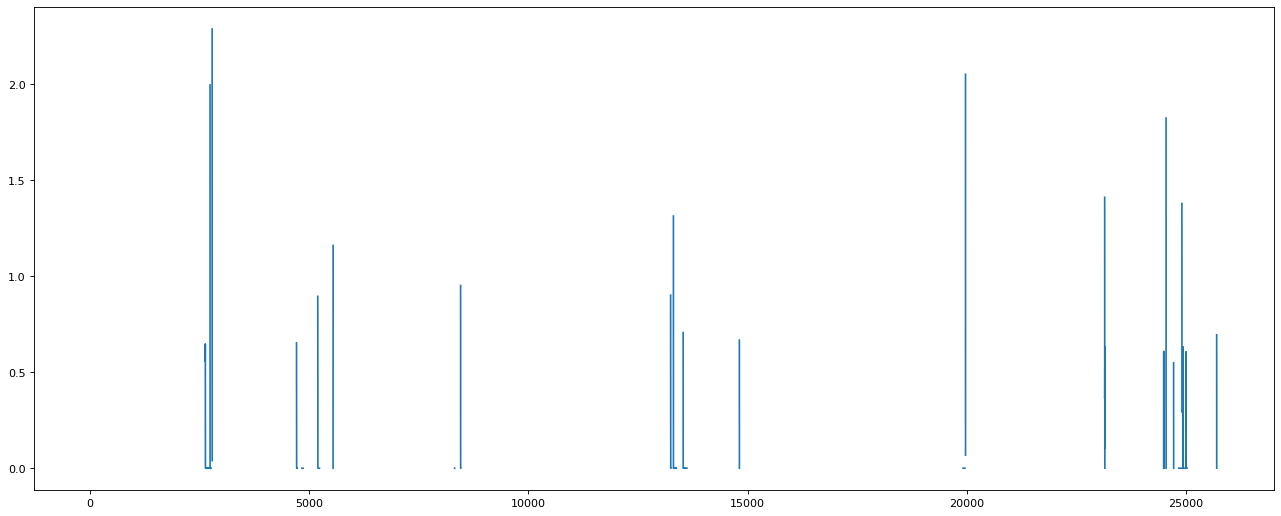

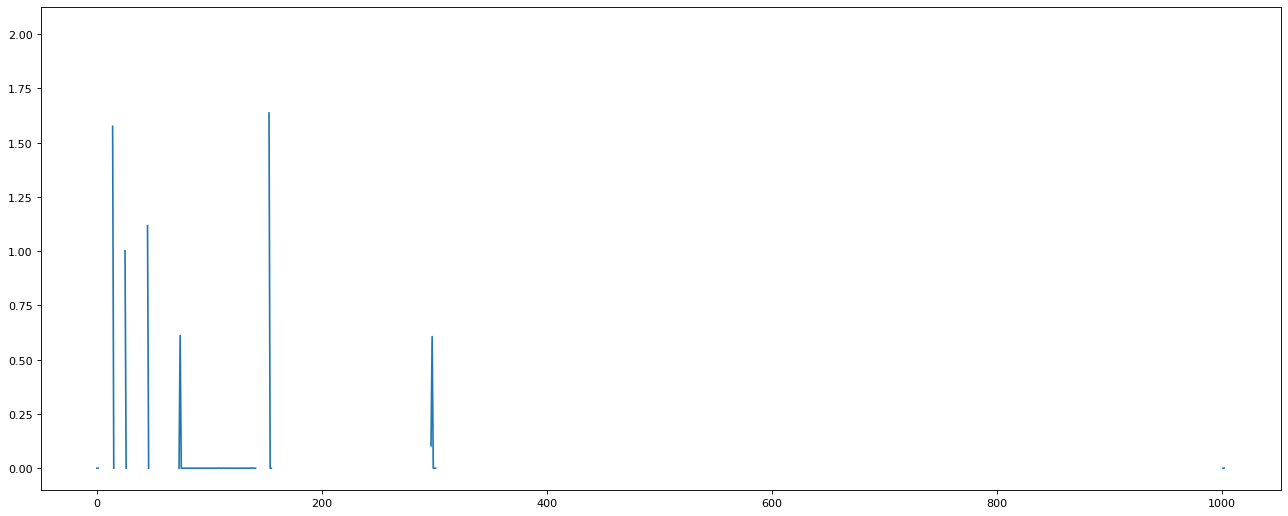

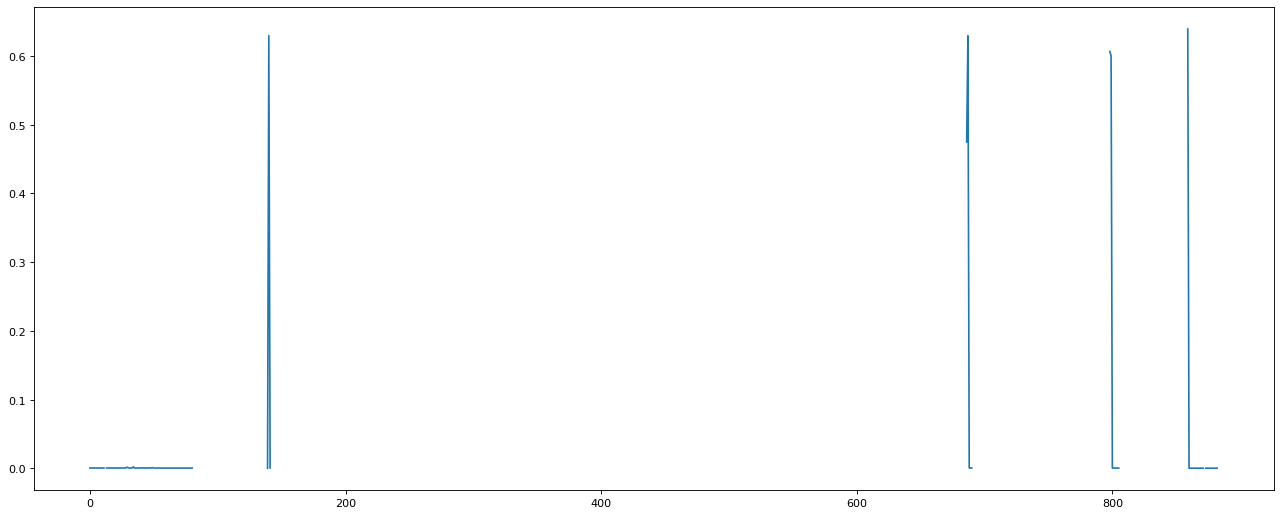

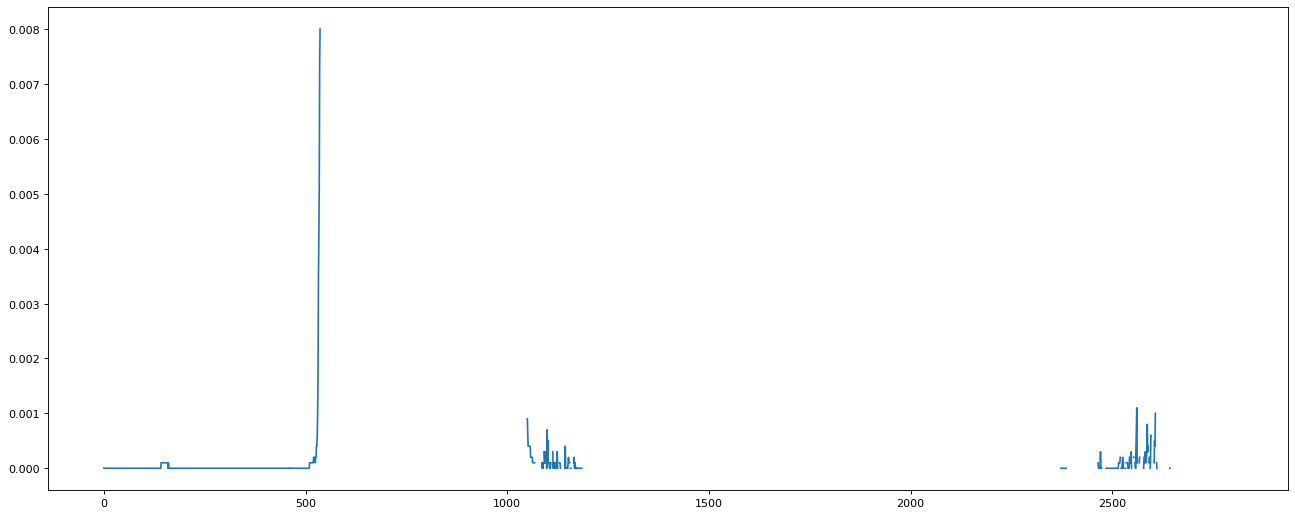

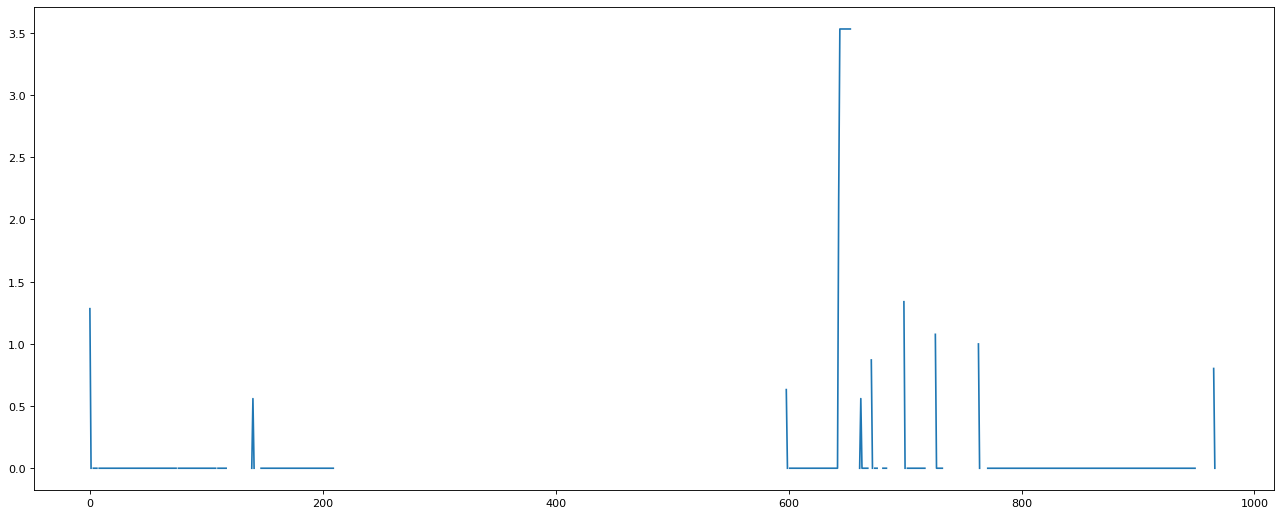

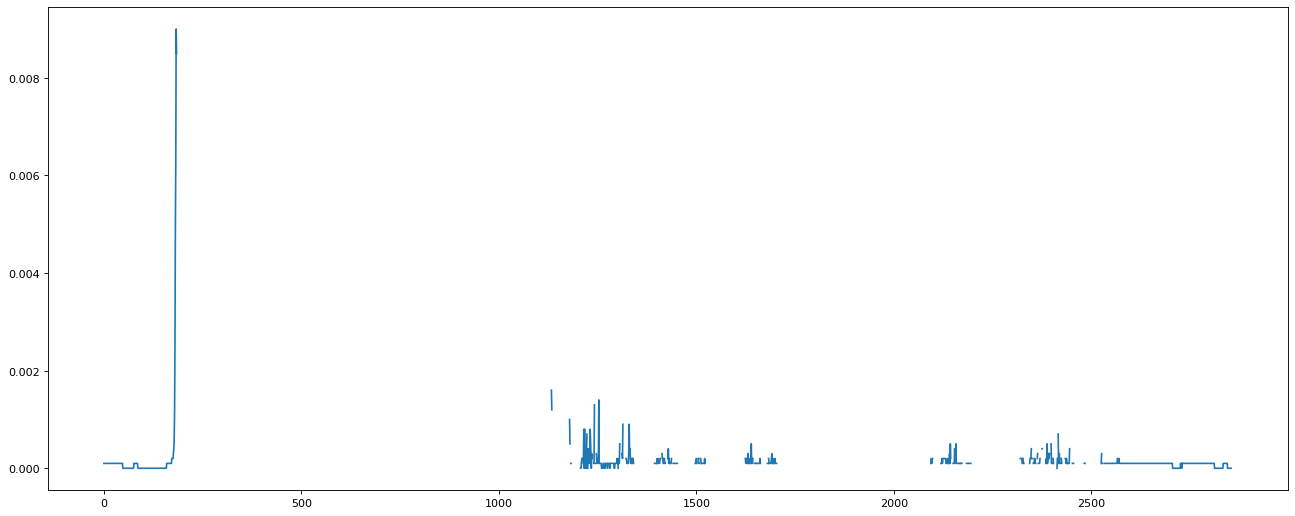

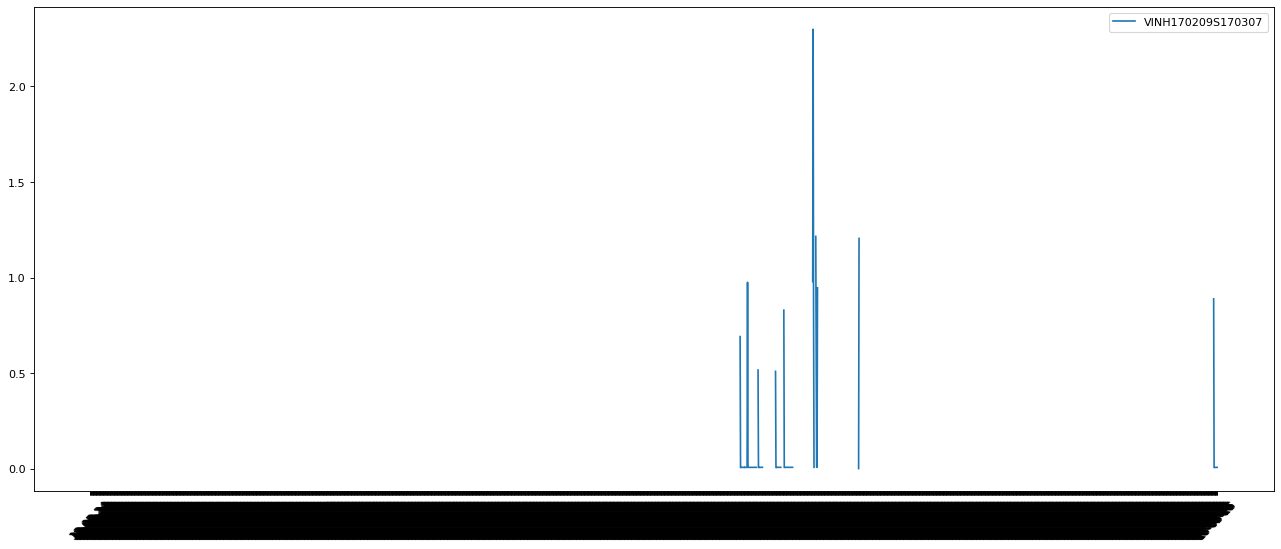

In [9]:
# 根据车辆vin分组绘制时间序列图
data1['battery_cell_voltage_list']=data1['battery_cell_voltage_list'].astype('double')

data1['obd_time'] = pd.to_datetime(data1['obd_time'])
data1.set_index('obd_time',inplace=True)


for group_name,group_data in data1.groupby('vin'):
    plt.figure(figsize=(20,8),dpi=80) 
    data12=group_data.resample('30S').mean()['battery_cell_voltage_list']
#     data12.dropna()
    
    _x = data12.index
    _y = data12.values
    
    _x=[i.strftime("%y-%m-%d") for i in _x]
    
    plt.plot(range(len(_x)),_y,label=group_name)
    
plt.xticks(range(len(_x)),_x,rotation=45)
plt.legend(loc="best")    
plt.show()